In [56]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
filepath="https://github.com/dsrscientist/DSData/raw/master/Advertising.csv"
data=pd.read_csv(filepath)

In [3]:
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
# we will remove unnamed column which is of no use so we will drop
data=data.drop(columns=['Unnamed: 0'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
## As we see there is no null value
## all are float value so no need to transform into float
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
## from describe data is not normalized so we want to normalized the dataset

In [8]:
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [9]:
data.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

## We want to Predict the sales with other features such as "TV","RADIO" and "NEWSPAPER"

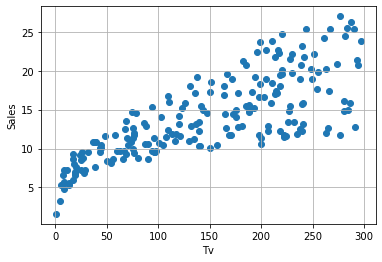

In [10]:
## lets visualize the features comparing with sales

plt.scatter(x = data['TV'], y = data['sales'],)
plt.xlabel("Tv")
plt.ylabel("Sales")
plt.grid(True)

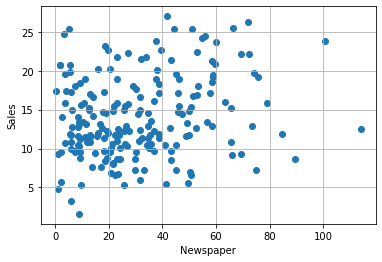

In [11]:
plt.scatter(x = data['newspaper'], y = data['sales'],)
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.grid(True)

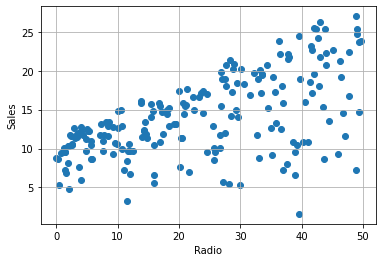

In [12]:
plt.scatter(x = data['radio'], y = data['sales'],)
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.grid(True)

# As we can see that in "Newspaper",the sale is inversely proportional to the newspaper investment

<AxesSubplot:>

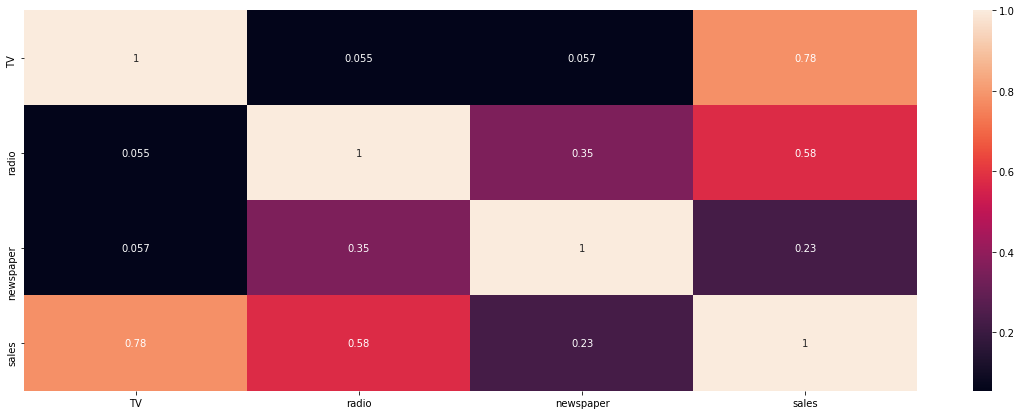

In [13]:
## we will correlate the data and visualize through heatmap
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True)

# As we can see that highest correlation with sales is the "TV" i.e 78% and the least relation is with the "newspaper" i.e 23%

# using the model to predict which feature will give more model_confidence

In [14]:
import statsmodels.formula.api as smf
lr=LinearRegression()
lr=smf.ols(formula="sales ~ TV",data=data).fit()
print(lr.conf_int)
lr.rsquared

<bound method RegressionResults.conf_int of <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000D6FE264820>>


0.611875050850071

In [15]:
lr=LinearRegression()
lr=smf.ols(formula="sales ~ TV+newspaper",data=data).fit()
print(lr.conf_int)
lr.rsquared

<bound method RegressionResults.conf_int of <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000D6FDEC7F40>>


0.6458354938293271

In [69]:
lr=LinearRegression()
lr=smf.ols(formula="sales ~ TV+newspaper+radio",data=data).fit()
print(lr.conf_int)
lr.rsquared

<bound method RegressionResults.conf_int of <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000BEE180A220>>


0.8972106381789522

In [42]:
x=data.drop('sales',axis=1)
y=data['sales']

In [44]:
sc = StandardScaler()
X_scalar=sc.fit_transform(x)

In [45]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scalar, y, test_size = 0.25)

In [70]:
## from above we can conclude that investing in all the features will increase the sale because when all the features are
## used,it will give 89% model confidence 

In [47]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
Y_pred_train = model.predict(X_train)

In [49]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_train, Y_pred_train))

Coefficients: [ 4.00038806  2.81693862 -0.0999756 ]
Intercept: 13.93535484080017
Mean squared error (MSE): 2.90
Coefficient of determination (R^2): 0.89


In [50]:
Y_pred_test = model.predict(X_test)

In [51]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, Y_pred_test))

Coefficients: [ 4.00038806  2.81693862 -0.0999756 ]
Intercept: 13.93535484080017
Mean squared error (MSE): 2.52
Coefficient of determination (R^2): 0.92


In [53]:
from sklearn.linear_model import  Ridge,RidgeCV
ridgecv=RidgeCV()
ridgecv.fit(X_train,y_train)
ridgecv.alpha_
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train,y_train)
ridge_model.score(X_test,y_test)

0.9177634617607203

In [54]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
dt = DecisionTreeRegressor(criterion='mse',max_depth=5) 
  
# fit the regressor with X and Y data
dt.fit(X_train, y_train)
dt.score(X_train,y_train)
dt.score(X_test,y_test)

0.9322936775671085

In [55]:
from sklearn.ensemble import  RandomForestRegressor
regressor = RandomForestRegressor(criterion='mse', max_depth=7, n_estimators=18,min_samples_split=5,min_samples_leaf=1)
regressor.fit(X_train, y_train) 
regressor.score(X_train,y_train)
regressor.score(X_test,y_test)

0.9670848955189336

In [59]:
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {'n_estimators': [10, 25, 50, 100, 150, 200],
                       'max_features':['auto','sqrt','log2'],
                       'max_depth':[1, 2, 3, 4, 5]}
search = RandomizedSearchCV(estimator = regressor, param_distributions = param_distributions, n_iter=100, scoring='neg_mean_absolute_error', n_jobs=-1, cv=10, verbose=10, return_train_score=True)

In [60]:
search.fit(X_train,y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(max_depth=7,
                                                   min_samples_split=5,
                                                   n_estimators=18),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [10, 25, 50, 100, 150,
                                                         200]},
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=10)

In [61]:
best_model = search.best_estimator_
best_model

RandomForestRegressor(max_depth=5, min_samples_split=5, n_estimators=10)

In [ ]:
## so we got 0.7 error so our score will be 93%

In [62]:
mod=RandomForestRegressor(max_depth=5,min_samples_split=5)
mod.fit(X_train,y_train)
pred=mod.predict(X_test)
print(mean_absolute_error(y_test,pred))

0.7395345920839093


## Saving the model

In [63]:
import joblib
joblib.dump(mod,"AdvertisementPrediction.pkl")

['AdvertisementPrediction.pkl']